<a href="https://colab.research.google.com/github/SarahLares/Clustering_on_Survery/blob/master/Tarea_3_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agrupación de Estudiantes Encuestados

In [0]:
import pandas as pd

## Importamos la Data
 

 Se utilizará la data  **Turkiye Student Evaluation Data Set**, perteneciente al repositorio  [**UCI**](https://archive.ics.uci.edu/ml/datasets/Turkiye+Student+Evaluation) de la Universidad de California.



In [0]:
url = 'https://raw.githubusercontent.com/SarahLares/Clustering_on_Survery/master/turkiye-student-evaluation_generic.csv'
df = pd.read_csv(url) 

In [0]:
df.shape

(5820, 33)

El set de datos posee 33 características las primeras 5 corresponden a el instructor, la materia, numero de veces que el estudiante ha repetido la materia, asistencia y la dificultad de la materia según los estudiantes. Las otras 28 columnas corresponden a las preguntas de la encuesta, que fue respondida por 5820 alumnos.

In [350]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## Visualicemos un poco los datos

In [0]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

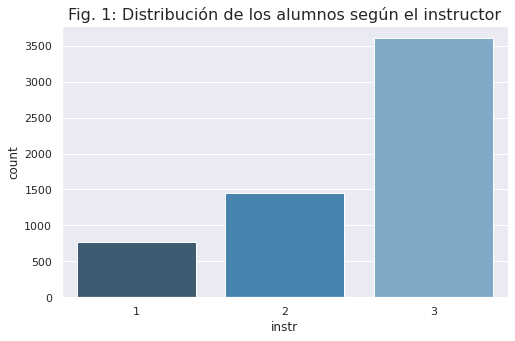

In [425]:
plt.figure(figsize=(8,5))
plt.title("Fig. 1: Distribución de los alumnos según el instructor",fontsize=16)
sns.countplot(x='instr', data=df, palette="Blues_d")
plt.show()

Podemos observar que el instructor **3** tuvo mas alumnos que respondieron la encuesta que los otros dos instructores.


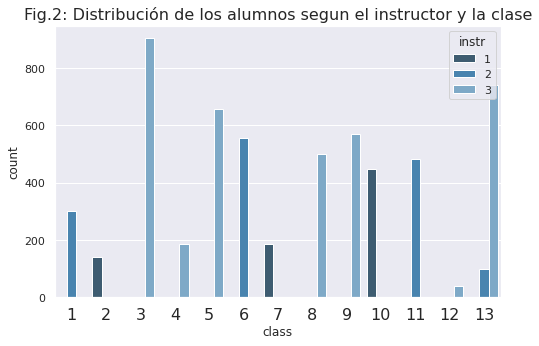

In [426]:
plt.figure(figsize=(8,5))
plt.title("Fig.2: Distribución de los alumnos segun el instructor y la clase",fontsize=16)
sns.countplot(x='class', data=df,hue='instr', palette="Blues_d")
plt.tick_params(axis='x', labelsize=16)
plt.show()

Podemos observar claramente, que hay una desigualdad en la cantidad de alumnos que realizaron la encuesta en cada clase. 

 Por otra parte, podemos observar que el instructor 3 tuvo más alumnos debido a que imparte más clases con más alumnos que los otros dos instructores.
 

### Sobre las preguntas en la encuesta

Q1: El contenido del curso semestral, el método de enseñanza y el sistema de evaluación se proporcionaron al principio.

Q2: Las metas y objetivos del curso se establecieron claramente al comienzo del período.

Q3: El curso valió la cantidad de crédito asignado.

Q4: El curso se impartió de acuerdo con el plan de estudios anunciado el primer día de clase.

Q5: Las discusiones en clase, tareas, solicitudes y estudios fueron 
satisfactorios.

Q6: El libro de texto y otros recursos de los cursos fueron suficientes y actualizados.

Q7: El curso permitió trabajo de campo, aplicaciones, laboratorio, discusión y otros estudios.

Q8: Los cuestionarios, tareas, proyectos y exámenes contribuyeron a ayudar al aprendizaje.

Q9: Disfruté mucho la clase y estaba ansioso por participar activamente durante las conferencias.

Q10: Mis expectativas iniciales sobre el curso se cumplieron al final del período o año.

Q11: El curso fue relevante y beneficioso para mi desarrollo profesional.

Q12: El curso me ayudó a mirar la vida y el mundo con una nueva perspectiva.

Q13: El conocimiento del Instructor era relevante y actualizado.

Q14: El instructor vino preparado para las clases.

Q15: El instructor enseñó de acuerdo con el plan de lección anunciado.

Q16: El instructor estaba comprometido con el curso y era comprensible.

Q17: El instructor llegó a tiempo para las clases.

Q18: El Instructor tiene una entrega / discurso suave y fácil de seguir.

Q19: El instructor hizo un uso efectivo de las horas de clase.

Q20: El instructor explicó el curso y estaba ansioso por ayudar a los estudiantes.

Q21: El instructor demostró un enfoque positivo para los estudiantes.

Q22: El instructor fue abierto y respetuoso con las opiniones de los estudiantes sobre el curso.

Q23: El instructor alentó la participación en el curso.

Q24: El instructor asignó tareas / proyectos relevantes y ayudó / guió a los estudiantes.

Q25: El instructor respondió a las preguntas sobre el curso dentro y fuera del curso.

Q26: El sistema de evaluación del Instructor (preguntas intermedias y finales, proyectos, tareas, etc.) midió efectivamente los objetivos del curso.

Q27: El instructor brindó soluciones a los exámenes y los discutió con los estudiantes.

Q28: El Instructor trató a todos los estudiantes de manera correcta y objetiva.

In [0]:
X_Q = df.iloc [:, 5:33] 
Q_means = X_Q.mean(axis = 0) 
Q_means = Q_means.to_frame('mean')
Q_means.reset_index(level=0, inplace=True)

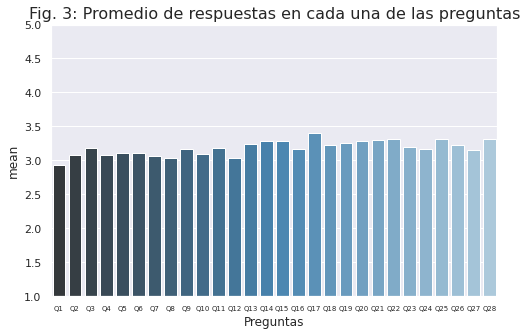

In [428]:
plt.figure(figsize=(8,5))
plt.title("Fig. 3: Promedio de respuestas en cada una de las preguntas",fontsize=16)
sns.barplot(x='index', y = 'mean', data = Q_means, palette="Blues_d")
plt.tick_params(axis='x', labelsize=7)
plt.xlabel('Preguntas')
plt.ylim(1,5)
plt.show()

Podemos observar que la media de cada pregunda está cercana a **3**

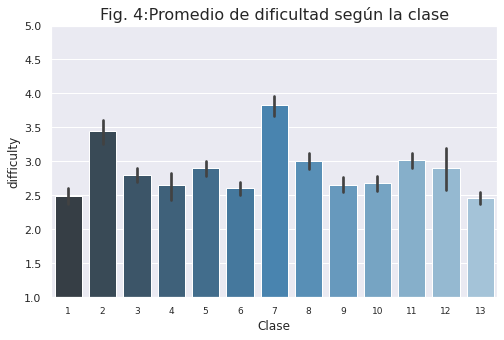

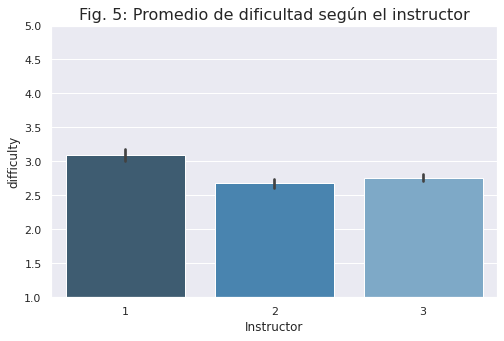

In [429]:
plt.figure(figsize=(8,5))
plt.title("Fig. 4:Promedio de dificultad según la clase",fontsize=16)

plt.ylim(1,5)
plt.tick_params(axis='x', labelsize=9)
sns.barplot(x='class', y = 'difficulty', data = df, palette="Blues_d")
plt.xlabel('Clase')
plt.show()


plt.figure(figsize=(8,5))
plt.title("Fig. 5: Promedio de dificultad según el instructor",fontsize=16)

plt.ylim(1,5)
sns.barplot(x='instr', y = 'difficulty', data = df, palette="Blues_d")
plt.xlabel('Instructor')
plt.show()

Podemos observar  en la figura 4 que las clases que fueron puntuadas con la mayor dificultad son la 2 y la 7, ambas impartidas por el instructos 1. Sin embargo, en ambas clases menos de 200 alumnos respondieron la encuesta, que es un número bajo comparado con clases como la 13 o la 3. Por lo cual, el instructor uno obtiene un promedio de dificultad mayor a los otros dos instructores (ver figura 5).

##Selección de los Datos

Sabemos que las respuestas a las preguntas de la encuesta se encuentran de la columna 5 a la 33 y que estas están escaladas con valores discretos del 1 al 5. 
Serán estudiadas las respuestas a las encuestas de tres materias, serán escogidas una por cada profesor.

*   clase 7, instructor 1, 187 alumnos respondieron la encuesta, promedio de dificultad de la clase según los alumnos 3.75
*   clase 8, instructor 3, 500 alumnos respondieron la encuesta, promedio de dificultad de la clase según los alumnos 3 
*   clase 11, instructor 2, 484 alumnos respondieron la encuesta, promedio de dificultad de la clase según los alumnos 3





In [0]:
df_C7 = df.loc[df['class']==7].iloc[:,5:]
df_C8 = df.loc[df['class']==8].iloc[:,5:]
df_C11 = df.loc[df['class']==11].iloc[:,5:]

### Correlación entre las preguntas de la encuesta

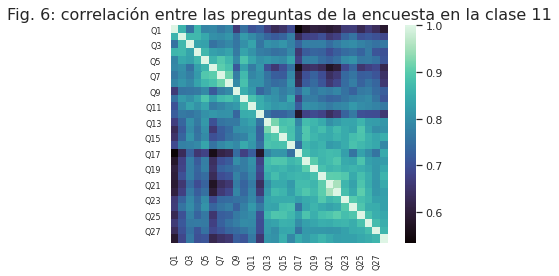

In [411]:
cor11 = df_C11.corr() 
sns.heatmap(cor11, square = True,cmap='mako')
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.title('Fig. 6: correlación entre las preguntas de la encuesta en la clase 11',fontsize=16)
plt.show()

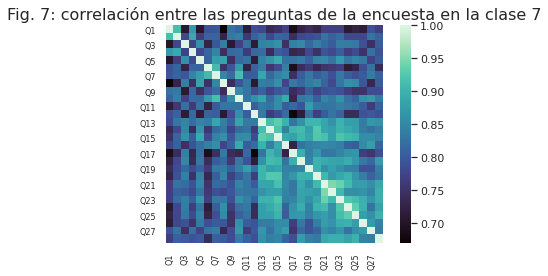

In [412]:
cor = df_C7.corr() 
plt.title('Fig. 7: correlación entre las preguntas de la encuesta en la clase 7',fontsize=16)
sns.heatmap(cor, square = True,cmap='mako')
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.show()

Para intentar conocer un poco más sobre la relación entre alguna de las preguntas de la encuesta se estudió la correlación entre las preguntas de la encuesta para la clase 7 y la 11.


Primero se calculó la matriz de correlación entre las variables y se graficó lo obtenido como un mapa de calor.

En la figura 6, podemos notar correlaciones entre las primeras 9 preguntas, sin embargo, esto no se observa tan claramente en la figura7.

Por otra parte, podemos observar en las gráficas 6 y 7 que existe una fuerte correlación entre las últimas 15 preguntas de la encuesta.



## K Means 

Se ralizará la descripción de los tres cursos seleccionados mediante la implementación de la técnica K Means. 



In [0]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_7 = ss.fit_transform(df_C7)
X_8 = ss.fit_transform(df_C8)
X_11 = ss.fit_transform(df_C11)

### Selección del numero de vecinos

Para la selección del número de vecinos se utilizó el método de la silueta.

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [0]:
sil_11 = []
sil_7 = []
sil_8 = []
for i in range(2,10):

  model_11 = KMeans(n_clusters= i, random_state=2)
  model_11.fit(X_11)
  sil_11.append(silhouette_score(X_11, model_11.fit_predict(X_11)))

  model_7 = KMeans(n_clusters= i, random_state=3)
  model_7.fit(X_7)
  sil_7.append(silhouette_score(X_7, model_7.fit_predict(X_7)))

  model_8 = KMeans(n_clusters= i, random_state=3)
  model_8.fit(X_8)
  sil_8.append(silhouette_score(X_8, model_8.fit_predict(X_8)))

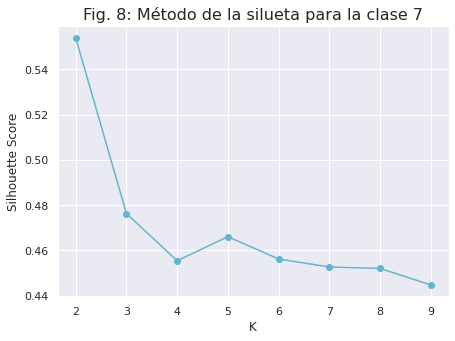

In [432]:
plt.figure(figsize=(7,5))
plt.plot(np.linspace(2,9,8),sil_7,'co-')
plt.xlabel ('K') 
plt.ylabel ('Silhouette Score')
plt.title('Fig. 8: Método de la silueta para la clase 7',fontsize=16) 
plt.show()

En la figura 8 podemos observar que según el método de la silueta la clase 7 puede agruparse en dos clusters.

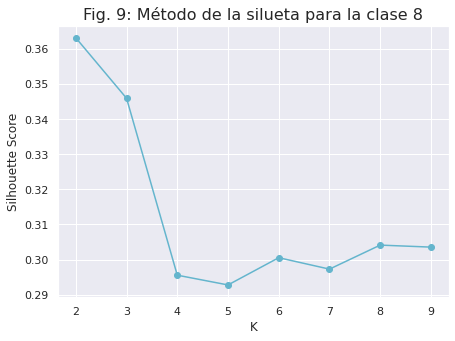

In [431]:
plt.figure(figsize=(7,5))
plt.plot(np.linspace(2,9,8),sil_8,'co-')
plt.xlabel ('K') 
plt.ylabel ('Silhouette Score')
plt.title('Fig. 9: Método de la silueta para la clase 8',fontsize=16) 
plt.show()

En la figura 9 podemos observar, que al igual que en la clase 7, la clase 8 puede agruparse en dos clusters.

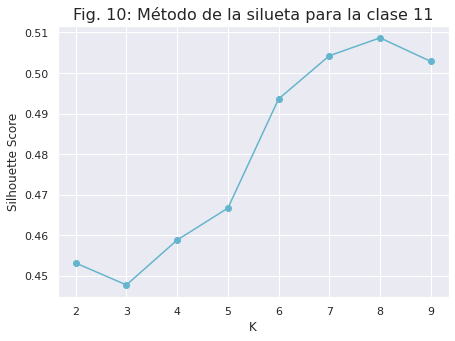

In [430]:
plt.figure(figsize=(7,5))
plt.plot(np.linspace(2,9,8),sil_11,'co-')
plt.xlabel ('K') 
plt.ylabel ('Silhouette Score')
plt.title('Fig. 10: Método de la silueta para la clase 11',fontsize=16) 
plt.show()

Por último, para la clase 11 (fig 10) para caracterizar la clase serán necesarios 8 clusters.

##Clustering

In [0]:
model_C7 = KMeans(n_clusters=2, random_state = 4).fit(X_7)
model_C8 = KMeans(n_clusters=2, random_state = 3).fit(X_8)
model_C11 = KMeans(n_clusters=8,random_state=1).fit(X_11)

Como podemos observar se tienen 28 características, lo cual dificultará la visualización de los clusters, por lo cual reduciremos la dimencionalidad utilizando el análisis de componentes principales ( PCA ). 

In [0]:
from sklearn.decomposition import PCA

In [0]:
labels_7 = model_C7.labels_
labels_8 = model_C8.labels_
labels_11 = model_C11.labels_

In [0]:
pca_11 = PCA(n_components=2 , random_state = 1)
pca_7 = PCA(n_components=2 , random_state = 1)
pca_8 = PCA(n_components=2 , random_state = 1)
X7_PCA = pca_7.fit_transform(X_7)
X8_PCA = pca_8.fit_transform(X_8)
X11_PCA = pca_11.fit_transform(X_11)

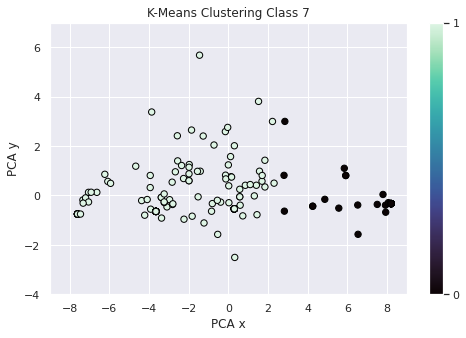

In [343]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(X7_PCA[:,0],X7_PCA[:,1],
                     c= labels_7,cmap='mako',s=40,edgecolors = 'black')
ax.set_title('K-Means Clustering Class 7')
ax.set_xlabel('PCA x')
ax.set_ylabel('PCA y')
ax.set_ylim(-4,7)
ax.set_xlim(-9,9)
plt.colorbar(scatter,ticks= [0,1],spacing='uniform')

plt.show()

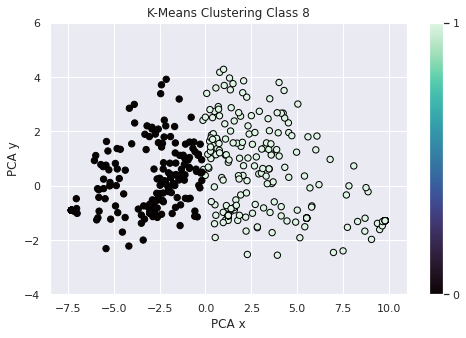

In [346]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(X8_PCA[:,0],X8_PCA[:,1],
                     c= labels_8,cmap='mako',s=40,edgecolors = 'black')
ax.set_title('K-Means Clustering Class 8')
ax.set_xlabel('PCA x')
ax.set_ylabel('PCA y')
ax.set_ylim(-4,6)
ax.set_xlim(-8.5,11)
plt.colorbar(scatter,ticks= [0,1],spacing='uniform')

plt.show()

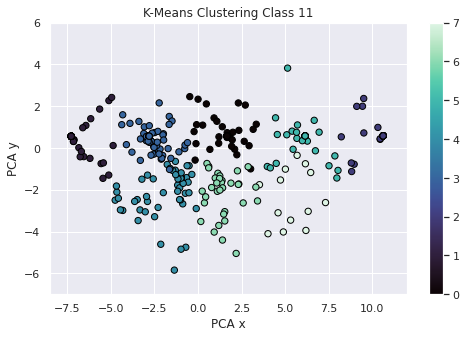

In [349]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(X11_PCA[:,0],X11_PCA[:,1],
                     c= labels_11,cmap = 'mako',s=40,edgecolors = 'black')
ax.set_title('K-Means Clustering Class 11')
ax.set_xlabel('PCA x')
ax.set_ylabel('PCA y')
ax.set_ylim(-7,6)
ax.set_xlim(-8.5,12)
plt.colorbar(scatter,spacing='uniform')
plt.show()